In [3]:
import pandas as pd
import numpy as np

In [64]:
names = pd.read_csv('../data/2019_50_noms_padro_decada_genere.csv')

In [65]:
newcolumns = ["Order","Name","Genre","Decade","Freq"]
names.columns = newcolumns

In [66]:
names.head()

,Order,Name,Genre,Decade,Freq
0,1,MARIA,Dona,Abans de 1930,1729
1,2,CARMEN,Dona,Abans de 1930,1239
2,3,JOSEFA,Dona,Abans de 1930,855
3,4,MONTSERRAT,Dona,Abans de 1930,738
4,5,ROSA,Dona,Abans de 1930,639


In [67]:
names.drop(["Order"],axis=1,inplace =True)

In [68]:
names['Genre'] = list(map(lambda x: "Female" if ( "Dona" in x ) else x, names['Genre']))

names.head()

,Name,Genre,Decade,Freq
0,MARIA,Female,Abans de 1930,1729
1,CARMEN,Female,Abans de 1930,1239
2,JOSEFA,Female,Abans de 1930,855
3,MONTSERRAT,Female,Abans de 1930,738
4,ROSA,Female,Abans de 1930,639


In [69]:
names['Genre'] = list(map(lambda x: "Male" if ( "Home" in x ) else x, names['Genre']))

names.head()

,Name,Genre,Decade,Freq
0,MARIA,Female,Abans de 1930,1729
1,CARMEN,Female,Abans de 1930,1239
2,JOSEFA,Female,Abans de 1930,855
3,MONTSERRAT,Female,Abans de 1930,738
4,ROSA,Female,Abans de 1930,639


In [70]:
names['Decade'] = list(map(lambda x: "Before 1930" if ( "Abans de 1930" in x ) else x, names['Decade']))

names.head()

,Name,Genre,Decade,Freq
0,MARIA,Female,Before 1930,1729
1,CARMEN,Female,Before 1930,1239
2,JOSEFA,Female,Before 1930,855
3,MONTSERRAT,Female,Before 1930,738
4,ROSA,Female,Before 1930,639


In [27]:
names.head(5)

,Name,Genre,Decade,Freq
0,MARIA,Female,Abans de 1930,1729
1,CARMEN,Female,Abans de 1930,1239
2,JOSEFA,Female,Abans de 1930,855
3,MONTSERRAT,Female,Abans de 1930,738
4,ROSA,Female,Abans de 1930,639


In [28]:
names.size

4400

In [29]:
names.shape                         

(1100, 4)

In [30]:
names["Name"].value_counts()

MARIA        11
NURIA        11
JORDI        11
ELENA        11
JOAN         11
             ..
EVA MARIA     1
TEO           1
NOEMI         1
LEO           1
ELVIRA        1
Name: Name, Length: 278, dtype: int64

In [31]:
len(names["Name"].value_counts())              #  278 nombres

278

In [32]:
names["Decade"].value_counts()

1980             100
1950             100
1970             100
2000             100
2010             100
1960             100
TOTAL            100
Abans de 1930    100
1940             100
1930             100
1990             100
Name: Decade, dtype: int64

In [33]:
len(names["Decade"].value_counts())             #      11 décadas

11

In [34]:
names["Freq"].max()                           

18645

In [35]:
names.describe()

,Freq
count,1100.000000
mean,1244.869091
std,1948.663823
min,32.000000
25%,379.000000
50%,624.000000
75%,1126.750000
max,18645.000000


In [38]:
names.head()

,Name,Genre,Decade,Freq
0,MARIA,Female,Abans de 1930,1729
1,CARMEN,Female,Abans de 1930,1239
2,JOSEFA,Female,Abans de 1930,855
3,MONTSERRAT,Female,Abans de 1930,738
4,ROSA,Female,Abans de 1930,639


In [74]:
nototal_names = names[names["Decade"] != "TOTAL"]

In [75]:
nototal_names.groupby("Decade").sum().sort_values(by="Freq")

,Freq
Decade,
Before 1930,21244
2010,50497
1930,63465
2000,65358
1990,70583
1980,83193
1940,91098
1950,97156
1960,103453


In [76]:
names.groupby("Decade").sum().sort_values(by="Freq")

,Freq
Decade,
Before 1930,21244
2010,50497
1930,63465
2000,65358
1990,70583
1980,83193
1940,91098
1950,97156
1960,103453


In [77]:
names[names['Decade']== 'TOTAL'].groupby(["Name","Genre"])["Freq"].sum().sort_values(ascending=False)      

Name          Genre 
MARIA         Female    18645
ANTONIO       Male      16211
MONTSERRAT    Female    15985
JOSE          Male      15109
JORDI         Male      13528
                        ...  
JOSE MARIA    Male       3136
RAUL          Male       3135
GERARD        Male       3015
JOSE ANTONIO  Male       3002
ROGER         Male       2970
Name: Freq, Length: 100, dtype: int64

In [78]:
len(nototal_names[nototal_names['Genre']=='Male']['Name'].unique())

125

In [79]:
names[names['Decade']!= 'TOTAL'].groupby(["Name","Genre"])["Freq"].sum().sort_values(ascending=False)

Name        Genre 
MARIA       Female    18645
ANTONIO     Male      15877
MONTSERRAT  Female    15698
JOSE        Male      14554
JORDI       Male      13528
                      ...  
VICENTA     Female      107
NIEVES      Female       94
FELISA      Female       92
GREGORIO    Male         39
ESTEBAN     Male         33
Name: Freq, Length: 278, dtype: int64

In [80]:
nototal_names.groupby(["Name","Genre"])["Freq"].sum().sort_values(ascending=False)       

Name        Genre 
MARIA       Female    18645
ANTONIO     Male      15877
MONTSERRAT  Female    15698
JOSE        Male      14554
JORDI       Male      13528
                      ...  
VICENTA     Female      107
NIEVES      Female       94
FELISA      Female       92
GREGORIO    Male         39
ESTEBAN     Male         33
Name: Freq, Length: 278, dtype: int64

In [117]:
female_names = pd.DataFrame(nototal_names[nototal_names["Genre"] == "Female"].groupby(["Decade","Genre","Name"])["Freq"].sum())

In [121]:
male_names = pd.DataFrame(nototal_names[nototal_names["Genre"] == "Male"].groupby(["Decade","Genre","Name"])["Freq"].sum())

In [160]:
femb30 = female_names.loc["Before 1930"].sort_values(by="Freq",ascending=False)             

femb30.head(5)

Freq
Genre  Name            
Female MARIA       1729
       CARMEN      1239
       JOSEFA       855
       MONTSERRAT   738
       ROSA         639

In [162]:
#female_names.loc["1930"].sort_values(by="Freq",ascending=False)      

In [163]:
#female_names.loc["1940"].sort_values(by="Freq",ascending=False)

In [164]:
#female_names.loc["1950"].sort_values(by="Freq",ascending=False) 

In [165]:
#female_names.loc["1960"].sort_values(by="Freq",ascending=False) 

In [166]:
#female_names.loc["1970"].sort_values(by="Freq",ascending=False) 

In [167]:
#female_names.loc["1980"].sort_values(by="Freq",ascending=False) 

In [168]:
#female_names.loc["1990"].sort_values(by="Freq",ascending=False) 

In [169]:
#female_names.loc["2000"].sort_values(by="Freq",ascending=False) 

In [161]:
fem10 = female_names.loc["2010"].sort_values(by="Freq",ascending=False) 

fem10.head(5)

Freq
Genre  Name         
Female JULIA    1208
       MARTINA  1194
       LAIA     1077
       LUCIA     995
       MARIA     982

In [158]:
maleb1930 = male_names.loc["Before 1930"].sort_values(by="Freq",ascending=False)    

maleb1930.head(5)

Freq
Genre Name           
Male  JOSE        685
      ANTONIO     493
      FRANCISCO   434
      JUAN        427
      MANUEL      386

In [170]:
#male_names.loc["1930"].sort_values(by="Freq",ascending=False) 

In [171]:
#male_names.loc["1940"].sort_values(by="Freq",ascending=False) 

In [172]:
#male_names.loc["1950"].sort_values(by="Freq",ascending=False) 

In [173]:
#male_names.loc["1960"].sort_values(by="Freq",ascending=False) 

In [174]:
#male_names.loc["1970"].sort_values(by="Freq",ascending=False) 

In [175]:
#male_names.loc["1980"].sort_values(by="Freq",ascending=False) 

In [176]:
#male_names.loc["1990"].sort_values(by="Freq",ascending=False) 

In [177]:
#male_names.loc["2000"].sort_values(by="Freq",ascending=False) 

In [159]:
male2010 = male_names.loc["2010"].sort_values(by="Freq",ascending=False) 

male2010.head(5)

Freq
Genre Name      
Male  MARC  1533
      ALEX  1129
      POL   1108
      ERIC   976
      PAU    965

array([[<AxesSubplot:title={'center':'Freq'}>]], dtype=object)

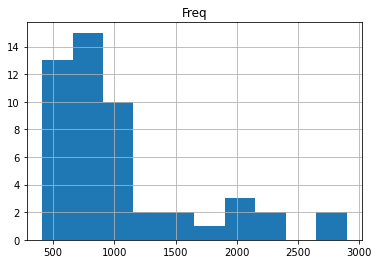

In [124]:
female_names.loc["1960"].sort_values(by="Freq",ascending=False).plot()  

In [ ]:
female_names.loc["1960"].sort_values(by="Freq",ascending=False).hist()  

<AxesSubplot:>

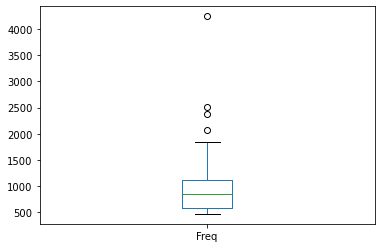

In [125]:
female_names.loc["1960"].sort_values(by="Freq",ascending=False).plot.box()  

-------------------------------